# D208 Performance Assessment Task 1

This is the code for my d208 performance assessment task 1. Student id: 012047746

## A1. Research Question

   For this performance assessment, my research question is "What quantitative variables most signficantly contribute to MonthlyCharge?". This is an important question to ask because understanding what factors contribute to MonthlyCharge can allow the business to focus on customers that provide higher revenue for the company.

## A2. State Objectives and Goals for Analysis

The goal of this analysis is to gain greater insight into what factors directly correlate with MonthlyCharge. In this analysis, I will be using linear regression modeling. Using linear regression, we can identify what multiple quantitative variables correlate with a single quantitative variable. The objective is to finish this analysis with a list of quantitative variables that signficantly correlate with MonthlyCharge.

## B1. Assumptions

There are four assumptions of a multiple linear regression model that we should consider. These are: 
- There is a linear relationship between the dependent variable and the independent variable. This is an issue because the assumption of linearity is violated if it is not true, which violates the fundamental assumptions of the model and brings its accuracy into question.
- The independent variables are not too highly correlated with each other. This is Multicollinearity. Multicollinearity occurs when two or more independent variables are highly correlated with each other. The reason that this causes problems is that it can be difficult to determine which of these correlated variables is the one that is affecting the dependent variable.
- Observations are selected independently and randomly from the population. This is a similar issue to multicollinearity where various independent variables are working together to create an affect on the dependent, and one's affect may be overstated.  
- Residuals should be normally distributed with a mean of zero. This is called Homoscedasticity. It is an issue because it can lead to biased and inefficient parameter estimates.

## B2. Programming Language and Benefits

The programming language that I used for this analysis is Python. Two reasons why I am using this language are:
- I am familiar with the language. I am not as comfortable with using R and understand how to code in Python. This will make the project completion more timely and efficient.
- Access to python libraries that can do multiple linear regression. There are a widespread list of libraries that I can use to finish my analysis for this project. This flexibility assists in timely 

The libraries that I will be using in this analysis are as follows:
- Pandas: This library is essential to import the CSV and apply analysis to the data.
- numpy: We use numpy to use arrays and set up the dataframe to be used for statistical analysis
- scipy.stats: We use scipy for many of the statistical models. For instance using zscores in order to detect outliers
- matplotlib: We use matplotlib for visualization such as histograms
- statsmodels.api: We use statsmodel to run our multiple linear regression model. We also use this for our VIF

### Import Libraries

In [1]:
# import the libraries
import pandas as pd
from pandas import DataFrame
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

## B3. Justification of Using Regression

Multiple linear regression is an appropriate technique to use for this analysis because the research question focuses on a dependant quantitative variable. In multiple linear regression, the only requirement is that the dependent variable needs to be quantiative, so the typing of the dependent variable determines that we must use linear regression to answer the research question, since the research question is focued around a quantitative variable.

## C1. Data Cleaning

For my data cleaning, I am going to start by focusing on null data, outliers, and duplicates. We can start by importing our data from a CSV. I am also going to drop all the categorical variables since we are only focusing on quantitative variables for this analysis. This means dropping Customer_id, Interaction, UID, City, State, County, Zip, Lat, Lng, Area, TimeZone, Job, Marital, Gender, Churn, Techie, Contract, Port_modem, Tablet, InternetService, Phone, Multiple, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, and PaymentMethod. 

In [2]:
df = pd.read_csv('churn_clean.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [4]:
dfq = df.drop(['Customer_id','Interaction','UID','City','State','County','Zip','Lat','Lng','Area','TimeZone','Job','Marital','Gender','Churn','Techie','Contract','Port_modem','Tablet','InternetService','Phone','Multiple','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','PaymentMethod'],axis=1)
dfq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Population            10000 non-null  int64  
 2   Children              10000 non-null  int64  
 3   Age                   10000 non-null  int64  
 4   Income                10000 non-null  float64
 5   Outage_sec_perweek    10000 non-null  float64
 6   Email                 10000 non-null  int64  
 7   Contacts              10000 non-null  int64  
 8   Yearly_equip_failure  10000 non-null  int64  
 9   Tenure                10000 non-null  float64
 10  MonthlyCharge         10000 non-null  float64
 11  Bandwidth_GB_Year     10000 non-null  float64
 12  Item1                 10000 non-null  int64  
 13  Item2                 10000 non-null  int64  
 14  Item3                 10000 non-null  int64  
 15  Item4               

### Treating Nulls

We begin by checking the dataframe for nulls. We can use .isnlull().sum() to look through the variables and see if there is any missing data. Using this function we can see that there are no nulls present in the data. Another thing I would like to check is population. This is because for a value like this, it cannot be 0 since it should count the customer. Using the nsmallest() function, we can see that zeroes do exist within the data. I would like to drop those zeroes and replace it with the median as the distribution is skewed right. We determine the distribution by creating a histogram of population. After dropping all the zero values from population and replacing them with median, we can see our minimum is no longer zero. 

In [5]:
dfq.isnull().sum()

CaseOrder               0
Population              0
Children                0
Age                     0
Income                  0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Tenure                  0
MonthlyCharge           0
Bandwidth_GB_Year       0
Item1                   0
Item2                   0
Item3                   0
Item4                   0
Item5                   0
Item6                   0
Item7                   0
Item8                   0
dtype: int64

In [6]:
# Check the poulation for zeroes
dfq.Population.nsmallest(n=10)

13     0
422    0
428    0
434    0
446    0
682    0
694    0
719    0
814    0
839    0
Name: Population, dtype: int64

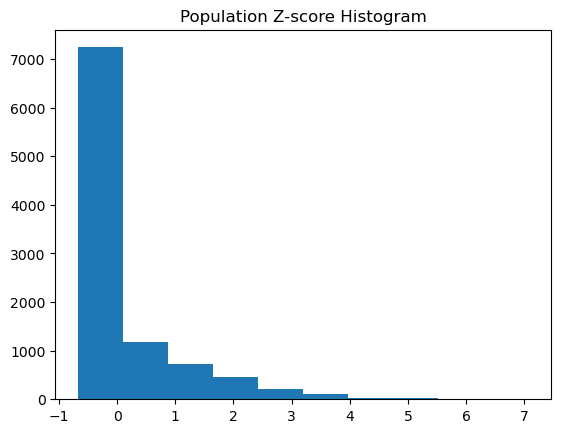

In [7]:
# create hist for population
dfq['zscore'] = stats.zscore(dfq['Population'])
plt.hist(dfq['zscore'])
plt.title('Population Z-score Histogram')
plt.show()

In [8]:
# drop all zeroes
dfq['Population'] = np.where(dfq['Population'] == 0, np.nan, dfq['Population'])
# fill with median as it is skewed right
dfq['Population'] = dfq['Population'].fillna(dfq['Population'].median())

In [9]:
# Check the poulation for zeroes
dfq.Population.nsmallest(n=10)

4453    2.0
261     4.0
3475    4.0
6018    4.0
2613    5.0
2092    6.0
2192    6.0
5054    6.0
5149    6.0
6048    6.0
Name: Population, dtype: float64

In [10]:
#drop zscore
dfq = dfq.drop(['zscore'],axis=1)

### Finding & Treating Duplicates

Next, we will check to see if there are any duplicates in the data. We can do this by using .duplicated().value_counts() which will output a true or false depending on whether or not duplicates exist within the dataframe. We can see from the output of false 10,000 times that there are no duplicates within the data.

In [11]:
dfq.duplicated().value_counts()

False    10000
dtype: int64

### Finding & Treating Outliers

We can start by checking the histograms of all of our quantiative variables. After looking through it, the distributions are as follows:
-  'CaseOrder' - normal 
-   'Population' - skewed right 
-   'Children' - skewed right 
-   'Age' - uniform 
-   'Income' - skewed right 
-   'Outage_sec_perweek' - normal 
-   'Email' - normal 
-   'Contacts' - skewed right 
-   'Yearly_equip_failure' - skewed right 
-   'Tenure' - bimodal  
-   'MonthlyCharge' - normal 
-   'Bandwidth_GB_Year' - bimodal 
-   'Item1' - normal 
-   'Item2' - normal 
-   'Item3' - normal 
-   'Item4' - normal 
-   'Item5' - normal 
-   'Item6' - normal 
-  'Item7' - normal 
-   'Item8' - normal 

This is useful information to note for later. We can also identify from our histograms if the data passes 3 standard deviations. I will use that as a cutoff for what we identify as outliers. Using this benchmark, the following variables contain outliers:
- Population, Children, Income, Outage_sec_perweek, Email, Contacts, Yearly_equip_failure, Item1, Item2, Item3, Item4, Item5, Item6, Item7, and Item8

Now that I know what variables are the ones that need to be solved, I can run a for loop to drop the outliers which are values equivalent to a z-score greater or less than 3 and -3 three respectively. We also need to know the distribution to understand what we need to imputer these variables with. For population we impute with median since it is skewed right. For children, we use median since it's skewed right. For income we use median. For outage_sec_perweek we use mean since it is distributed normally. For Email we use mean. For Contacts we use median. For Yearly_equip_failure we use median. For item1 through item8 we use mean.

After the for loop runs for both median and for mean, we are able to see that the histograms are fixed and the outliers have been treated.

In [12]:
# create a list of columns
dfq_c = dfq.columns.tolist()
dfq_c

['CaseOrder',
 'Population',
 'Children',
 'Age',
 'Income',
 'Outage_sec_perweek',
 'Email',
 'Contacts',
 'Yearly_equip_failure',
 'Tenure',
 'MonthlyCharge',
 'Bandwidth_GB_Year',
 'Item1',
 'Item2',
 'Item3',
 'Item4',
 'Item5',
 'Item6',
 'Item7',
 'Item8']

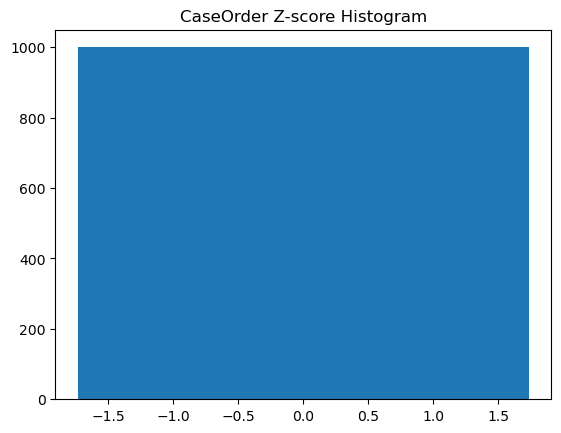

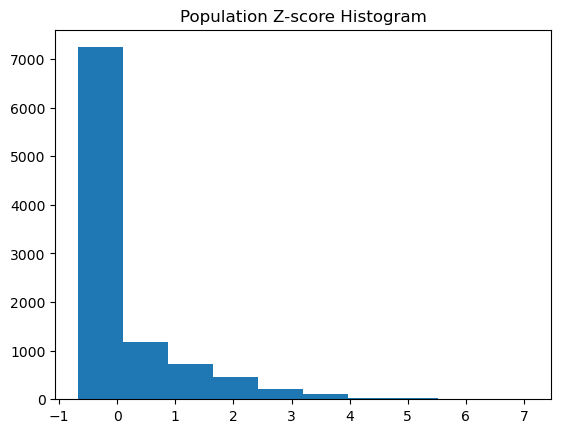

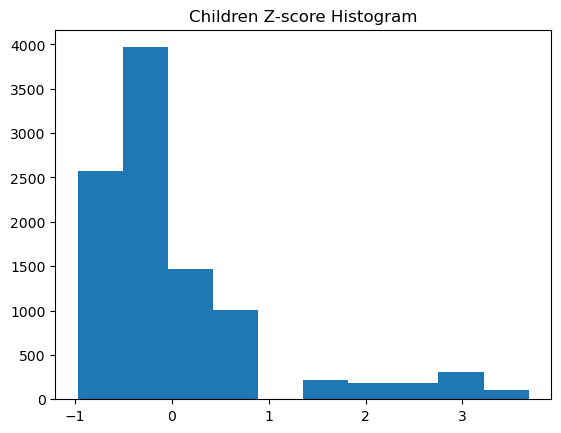

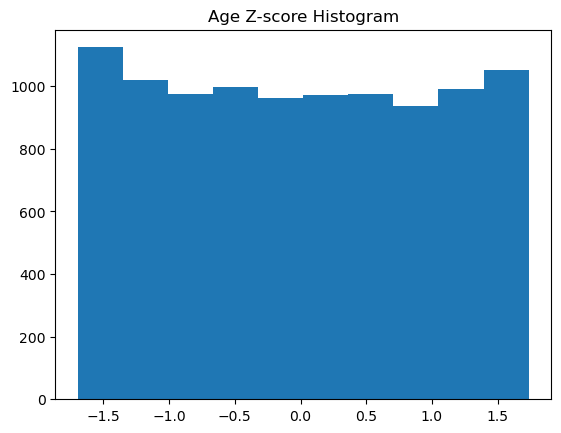

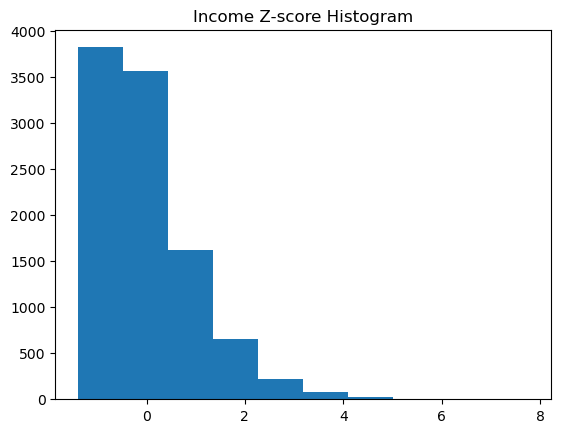

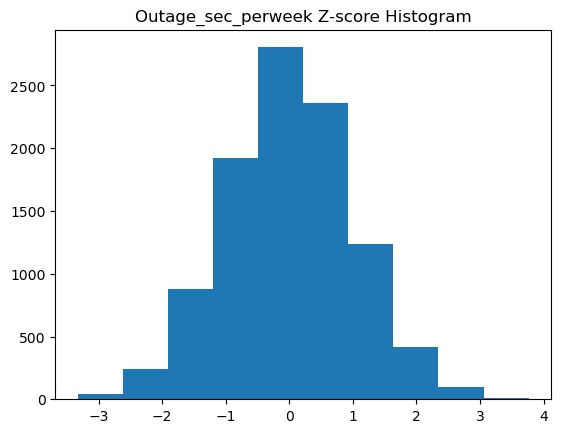

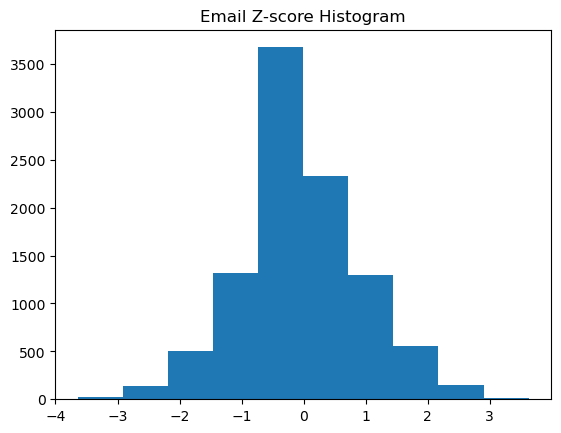

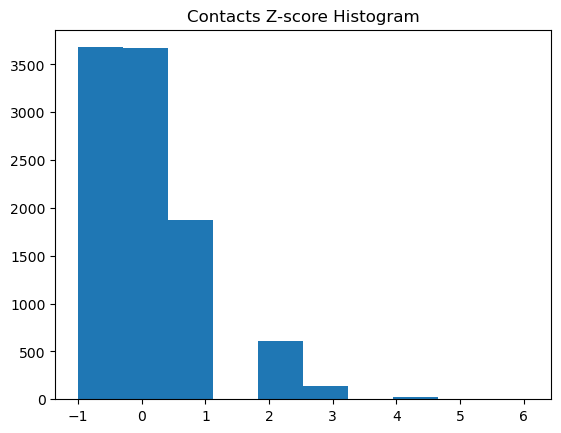

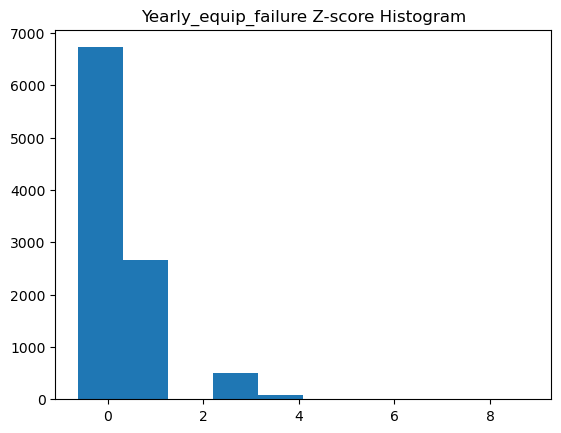

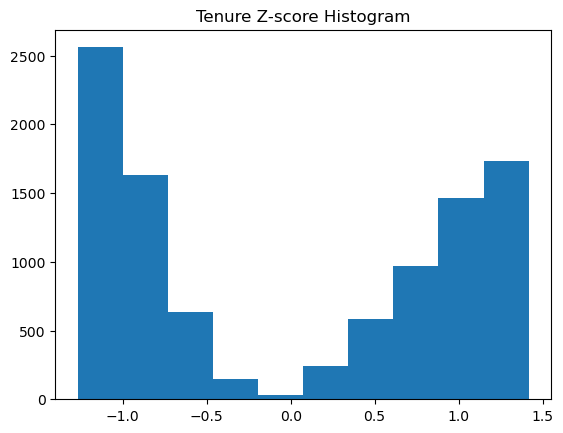

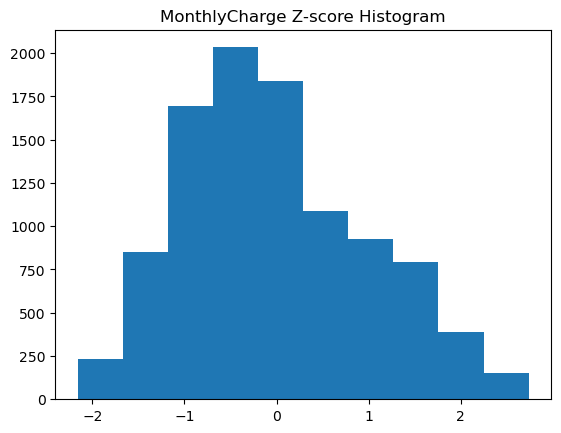

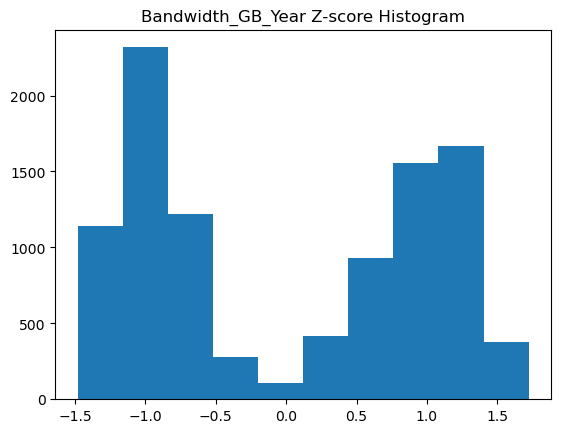

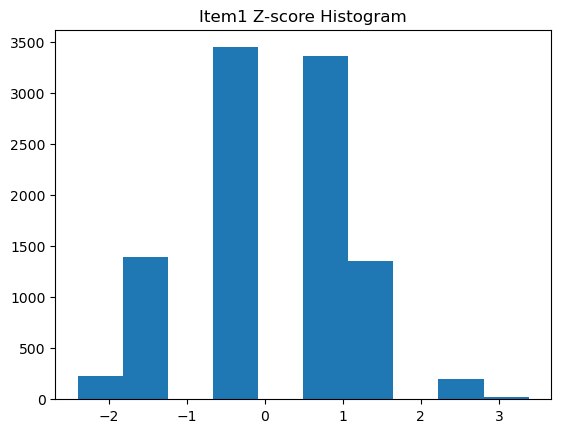

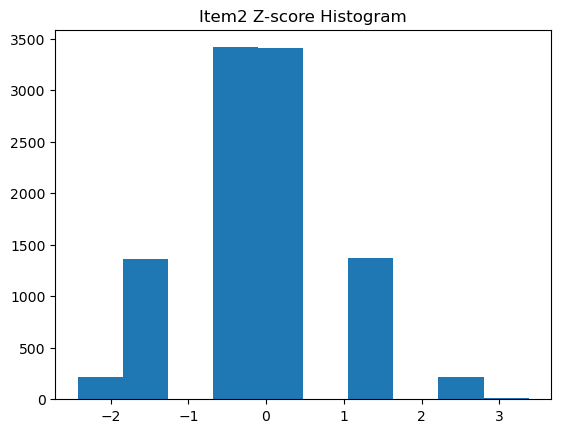

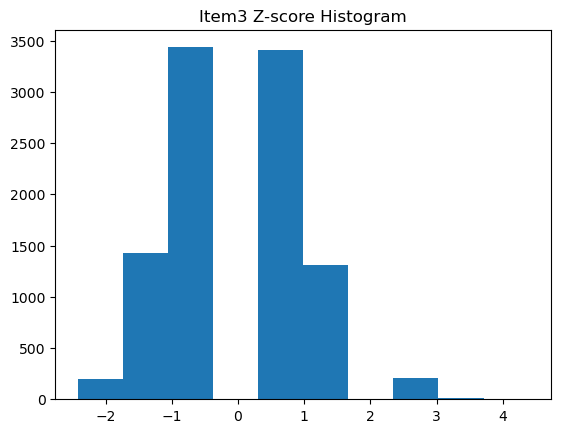

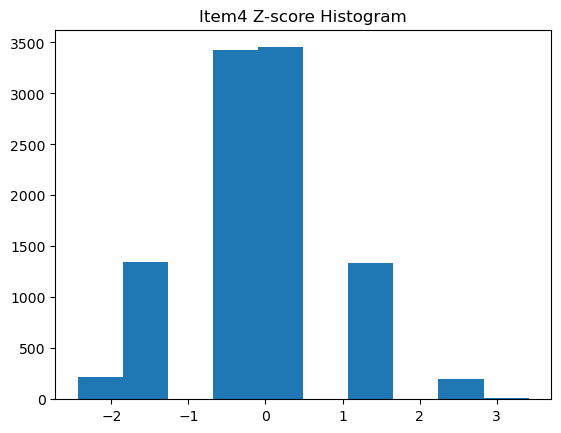

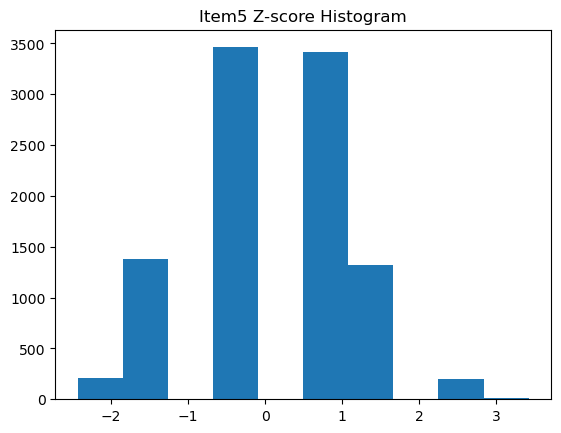

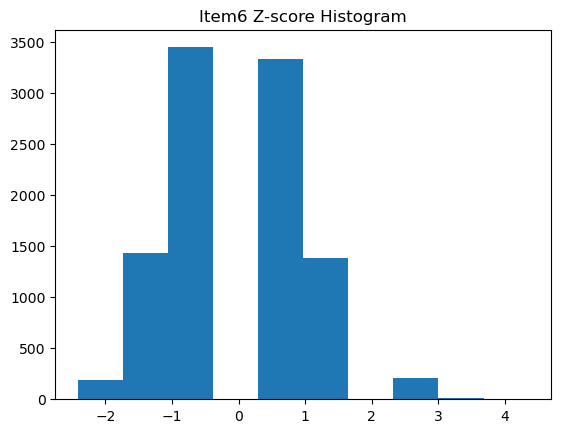

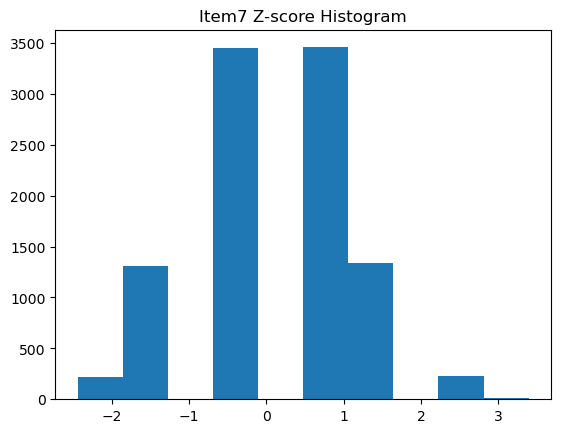

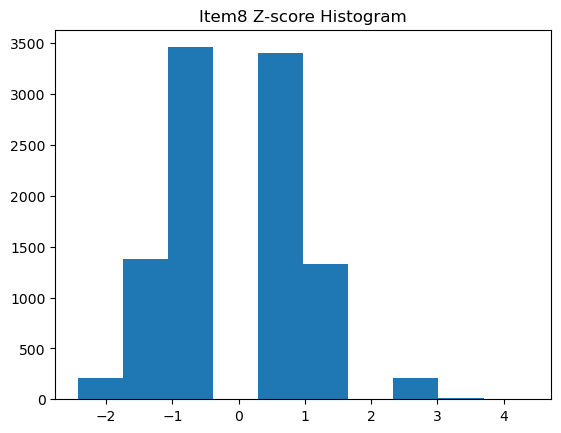

In [13]:
for column in dfq_c:
    dfq['zscore'] = stats.zscore(dfq[column])
    plt.hist(dfq['zscore'])
    plt.title(column + ' Z-score Histogram')
    plt.show()

In [14]:
# Run a for loop for all the identified variables that need to be fixed that will be replaced with median
dfq_z_median = ['Population', 'Children', 'Income', 'Contacts', 'Yearly_equip_failure']
dfq_z_median 
for column in dfq_z_median:
    # create nulls for outliers in population
    dfq['zscore'] = stats.zscore(dfq[column])
    dfq[column] = np.where(dfq['zscore'] > 2, np.nan, dfq[column])
    dfq[column] = np.where(dfq['zscore'] < -2, np.nan, dfq[column])
    # use fillna function to impute outliers with median
    dfq[column] = dfq[column].fillna(dfq[column].median())

In [15]:
# Run a for loop for all the identified variables that need to be fixed that will be replaced with mean
dfq_z_mean = ['Outage_sec_perweek', 'Email', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']
dfq_z_mean 
for column in dfq_z_mean:
     # create nulls for outliers in population
    dfq['zscore'] = stats.zscore(dfq[column])
    dfq[column] = np.where(dfq['zscore'] > 2, np.nan, dfq[column])
    dfq[column] = np.where(dfq['zscore'] < -2, np.nan, dfq[column])
    # use fillna function to impute outliers with mean
    dfq[column] = dfq[column].fillna(dfq[column].mean())   

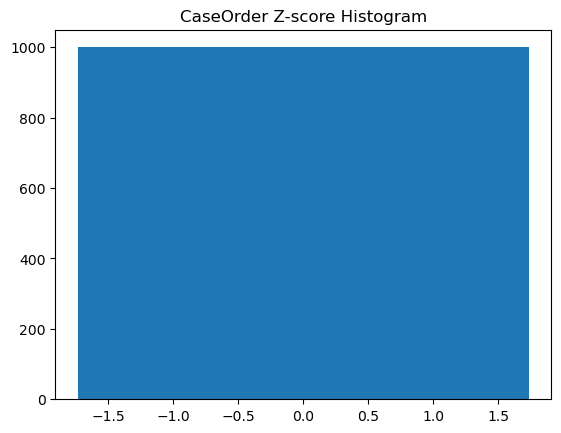

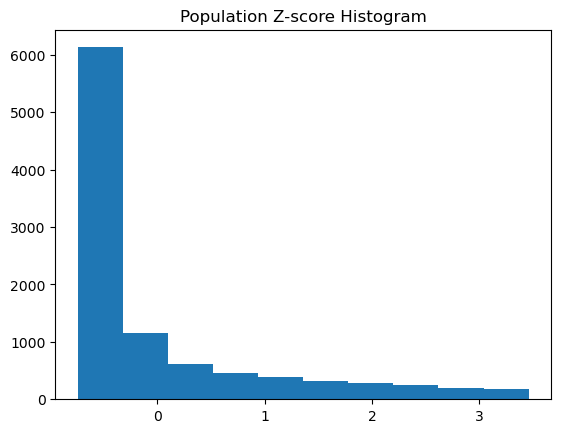

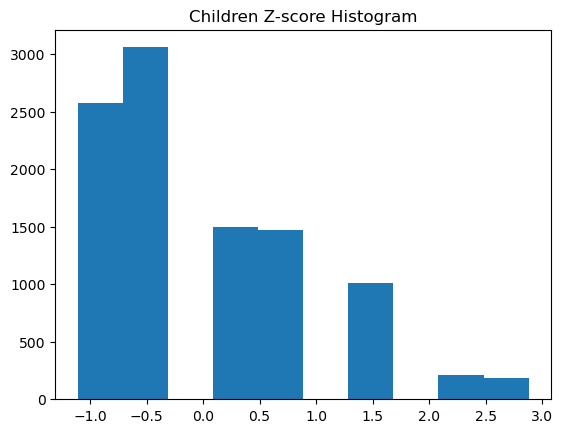

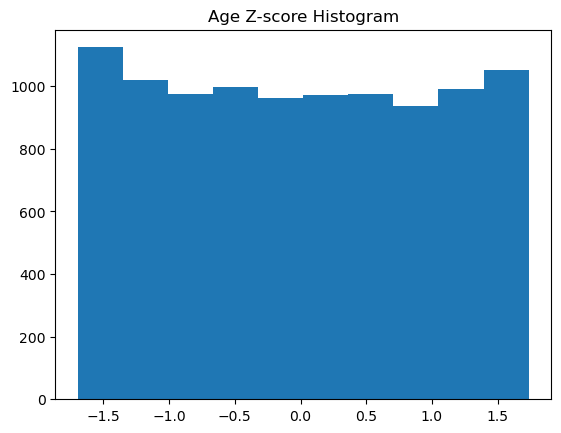

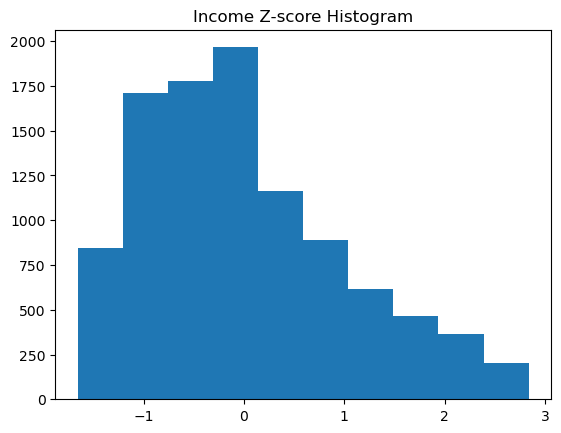

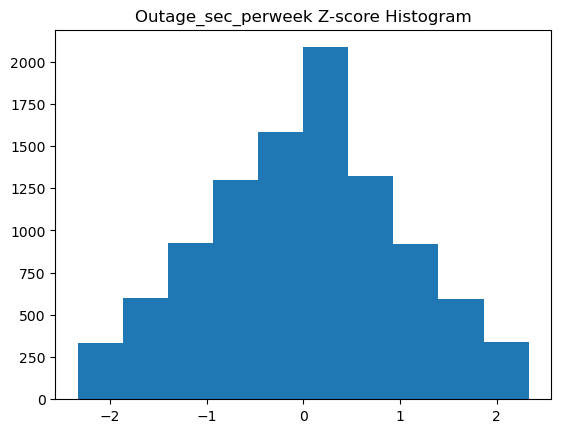

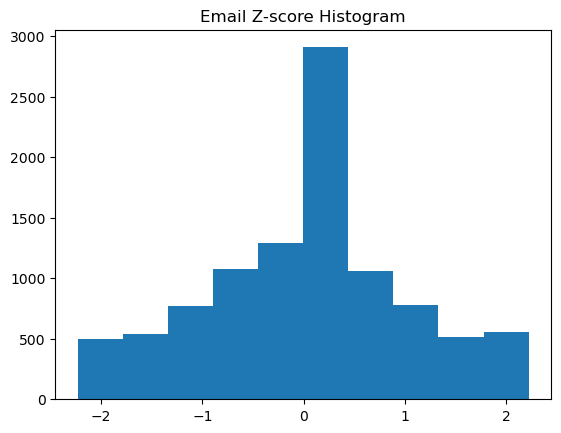

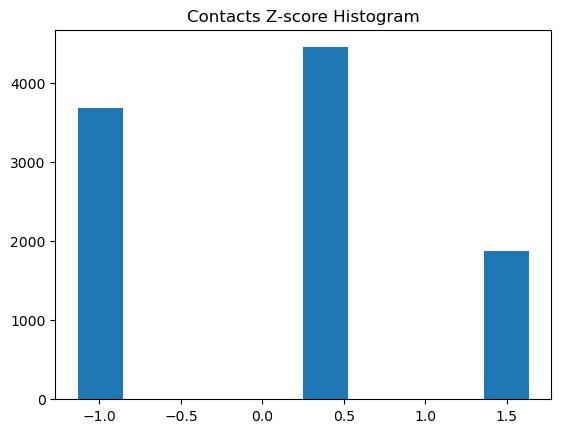

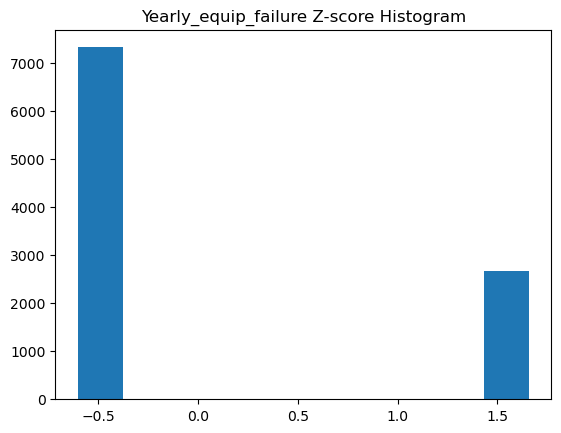

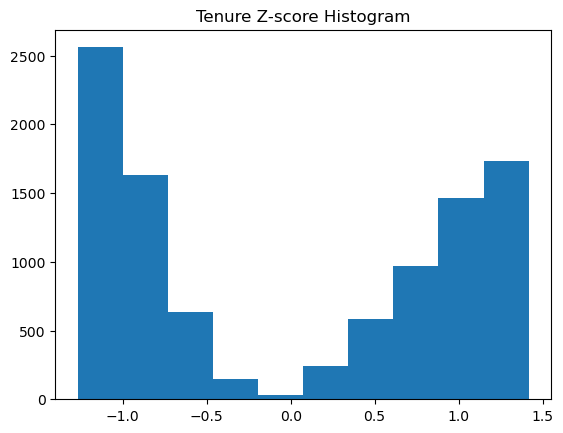

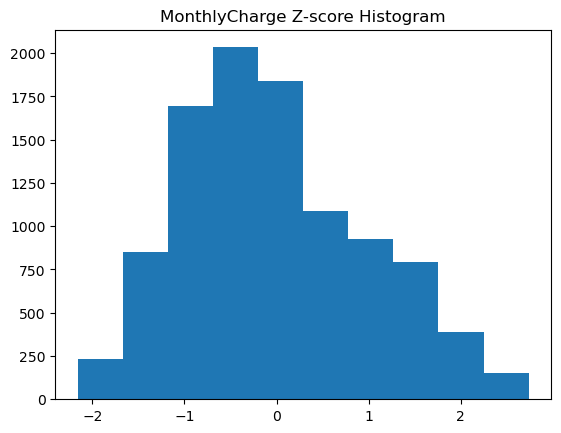

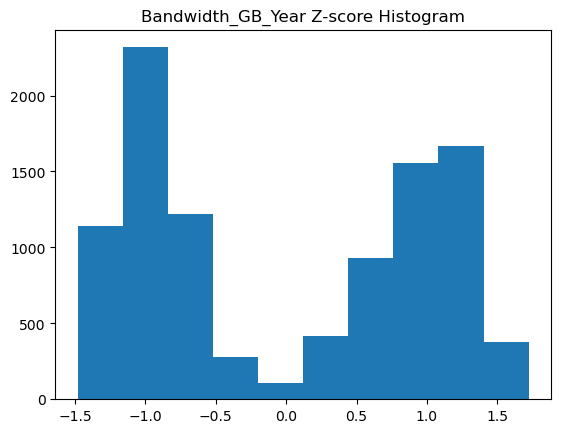

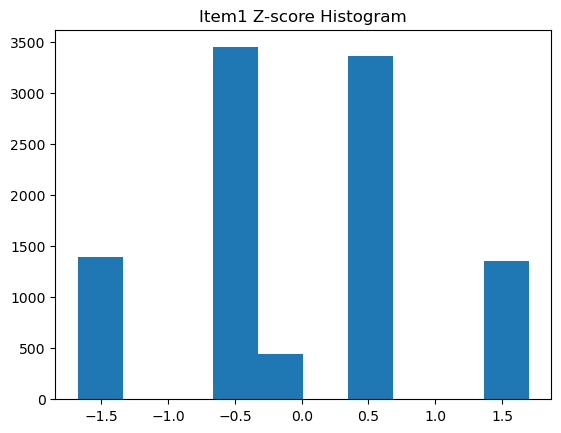

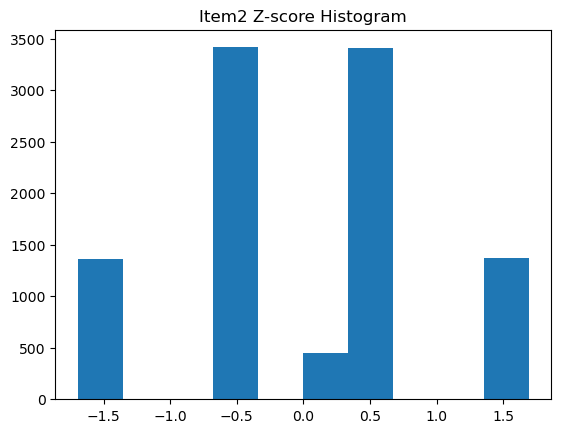

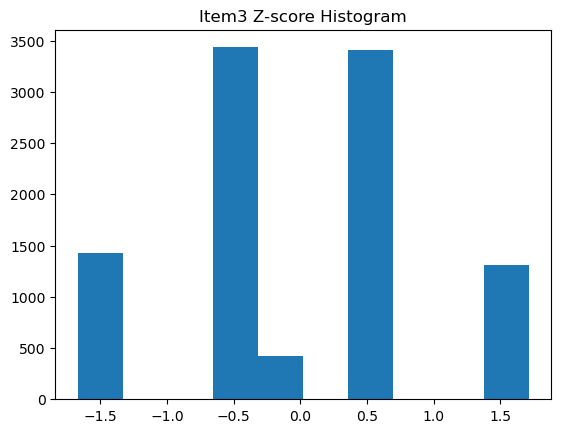

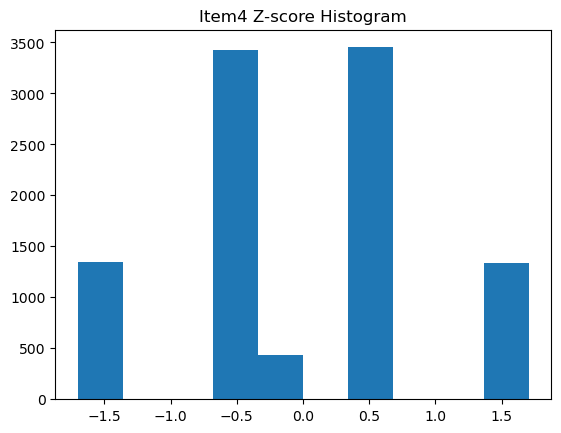

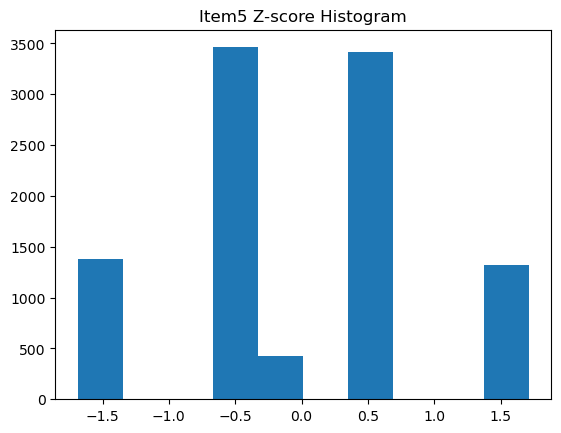

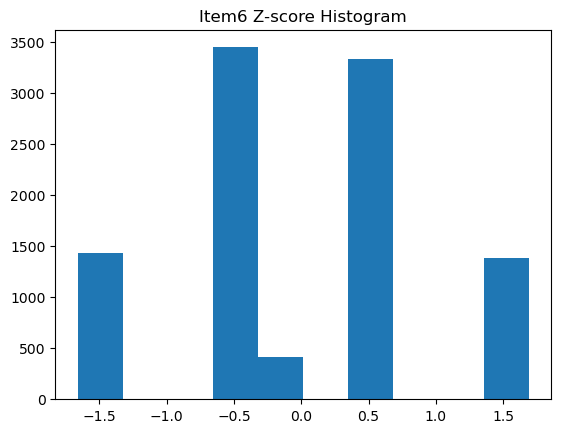

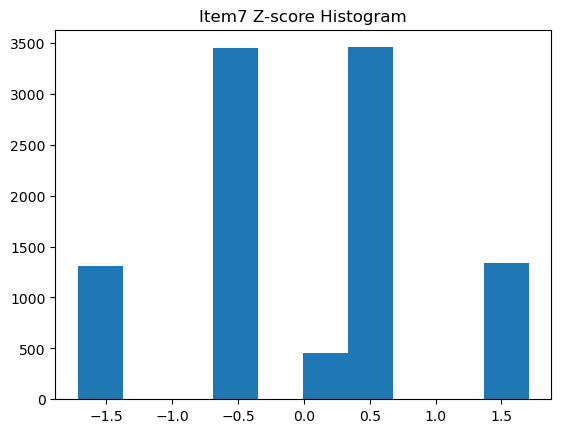

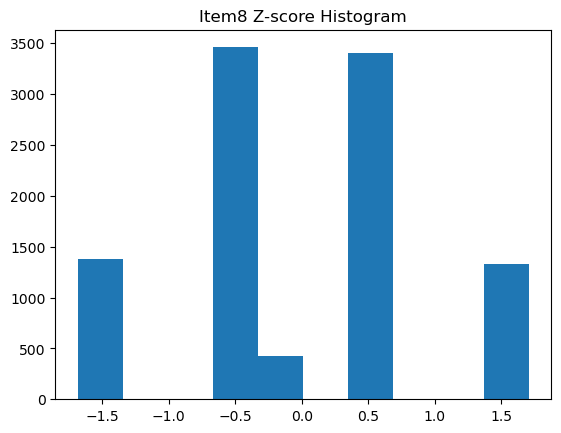

In [16]:
# check new histograms
for column in dfq_c:
    dfq['zscore'] = stats.zscore(dfq[column])
    plt.hist(dfq['zscore'])
    plt.title(column + ' Z-score Histogram')
    plt.show()

In [ ]:
for column in dfq_c:
    dfq['zscore'] = stats.zscore(dfq[column])
    plt.hist(dfq['zscore'])
    plt.title(column + ' Z-score Histogram')
    plt.show()

## C2. Data Exploration (EDA)

To get out summary statistics, we can use the describe function. I use a for loop to run the .describe() function and get summary statistics of all the variables. Its also important to note that all outliers have been removed.

CaseOrder: For CaseOrder, our summary statistics make sense. Each case is assigned a number and it goes from 1 to 10,000. The  summary statistics match what one would expect to see for a list of number from 1 to 10,000.

Population: The average population is 6817, the minimum is 2, and the maximum is 38,597. We can once again see the zeroes have been removed as per our treatment of nulls earlier in the analysis.

Children: The mean, which is calculated by adding up all the values and dividing by the n amount, is around 1.7 children. The most children is 6, and the least is 0.

Age: The average age is around 53. This means many of the customers tend to be older. The youngest customer is 18 and the oldest is 89.

Income: The average income is around 35,688 dollars. The lowest is 348 dollars and the highest is 96,190.

Outage_sec_perweek: On average there is an average outage time of 10 seconds per week. The minimum or lowest time is 4 seconds, and the highest is 15. This is interesting as we learn that there is never a point in time where there is a week without outages. 

Email: The avereage number of emails is 12. The minimum is 6 and the maximum is 18. This gives us insight that depending on the customer, different amounts of emails are sent. This may be because the business segments its customers or because some customers joined at different times and thus were not included in previous emails.

Contacts: The average for this variable is .8. The minimum is 0 and the max is 2. This shows us that customers do not frequently contact customer support, with the most a customer contacting them being 2 recorded times.

Yearly_equip_failure: The average for this variable is .3. The minimum is 0 and the maximum is 1. This shows us that its not frequent for a customer's equipment to fail, and that it will most likely not occur more than once according to our recorded history.

Tenure: The average tenure is around 34.5 months. The minimum is 1 and the max is 72. This shows us that tenure of the customer does generally not last for more than a few years according to our data.

MonthlyCharge: The average monthly charge is about 172 dollars a month. The minimum is 80 and max is 290. This could be due to different customers having different plans, customizable services, and offers. 

Bandwidth_gb_year: This is the amount of gb a customer uses per year.  On average it is 3392, with the lowest being 155.5 and the highest being 7158.98 gb.

Item1 through Item8: Items 1 through 8 should all have a minimum of 2 and a max of 5. This could be a result of how we cleaned the data, removing any outliers. On average the amount is about 

In [17]:
# run a for loop that goes through and uses .describe()
for column in dfq_c:
    print('Variable: ', column,'\n', dfq[column].describe(),'\n')

Variable:  CaseOrder 
 count    10000.00000
mean      5000.50000
std       2886.89568
min          1.00000
25%       2500.75000
50%       5000.50000
75%       7500.25000
max      10000.00000
Name: CaseOrder, dtype: float64 

Variable:  Population 
 count    10000.000000
mean      6817.325500
std       9188.402721
min          2.000000
25%        782.000000
50%       2610.000000
75%       8810.000000
max      38597.000000
Name: Population, dtype: float64 

Variable:  Children 
 count    10000.00000
mean         1.66700
std          1.50424
min          0.00000
25%          0.00000
50%          1.00000
75%          3.00000
max          6.00000
Name: Children, dtype: float64 

Variable:  Age 
 count    10000.000000
mean        53.078400
std         20.698882
min         18.000000
25%         35.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64 

Variable:  Income 
 count    10000.000000
mean     35688.400354
std      21324.318547
min       

## C3. Visualizations

For my univariate visualizations, we can look at the distributions of all of the variables using the actual values this time rather than the z-scores. Since we are using quantiative variables for the multiple linear regression analysis, I generate scatterplots for each of the variables for my bivariate visualizations

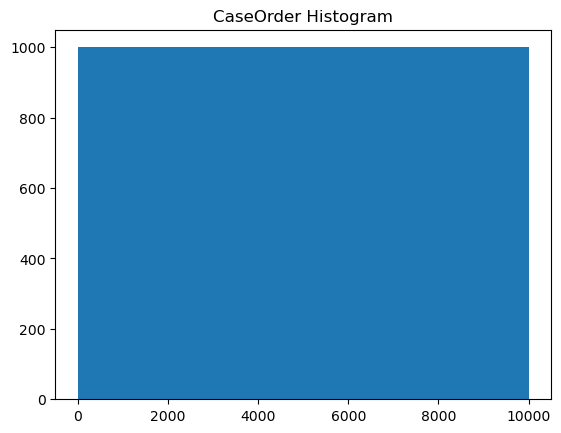

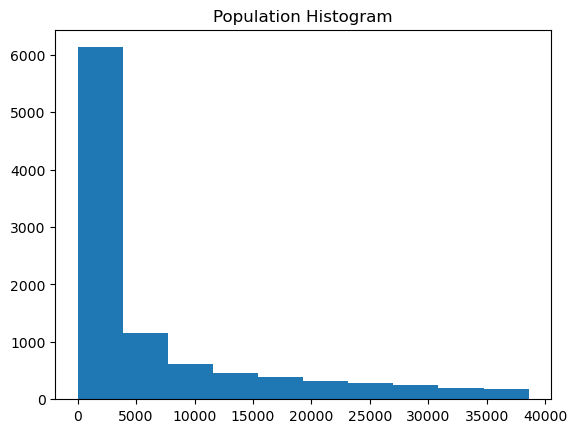

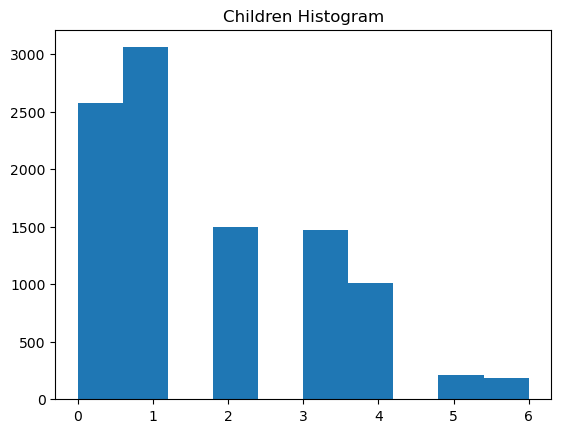

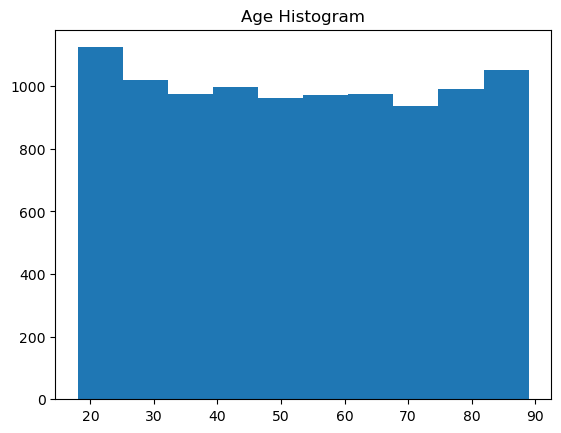

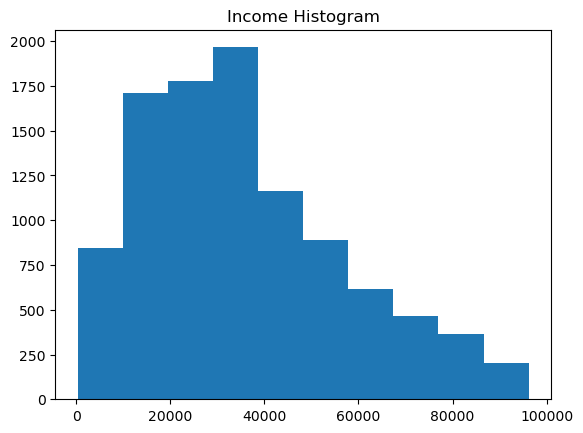

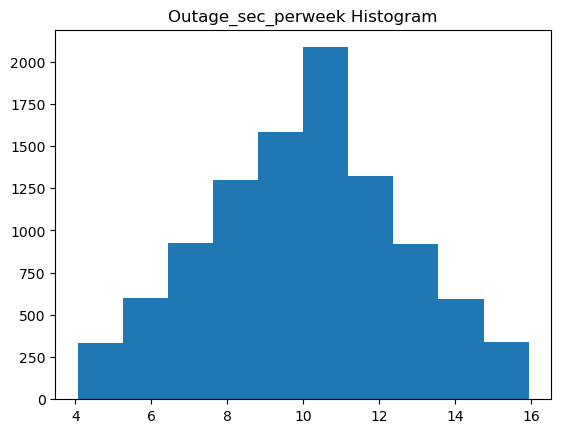

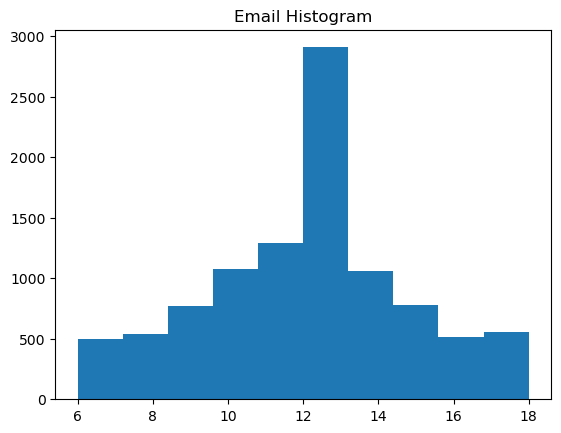

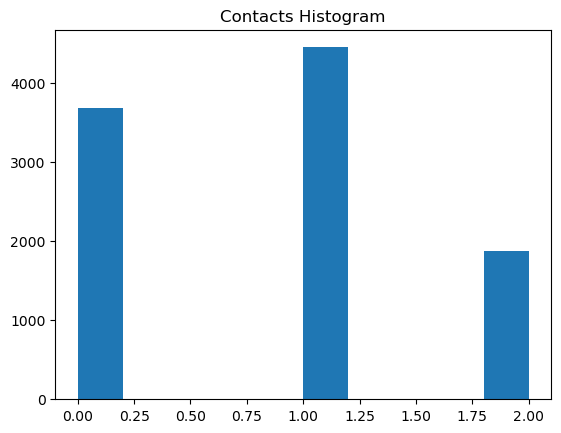

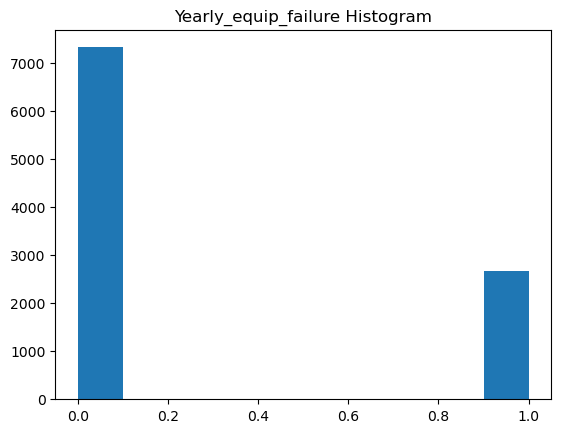

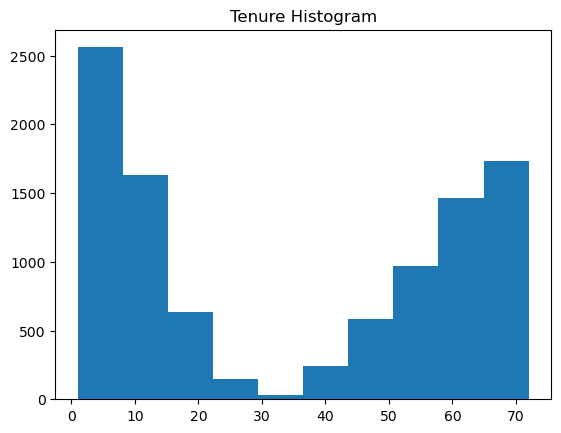

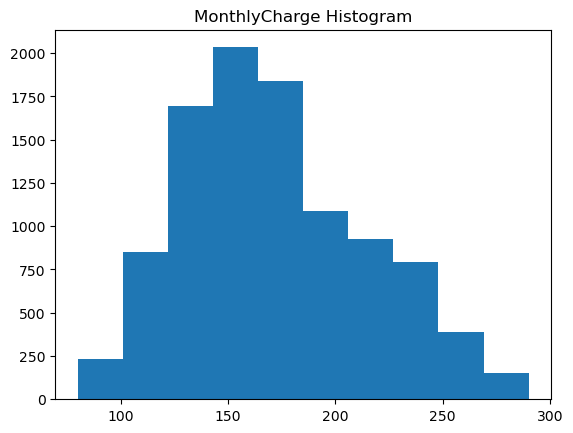

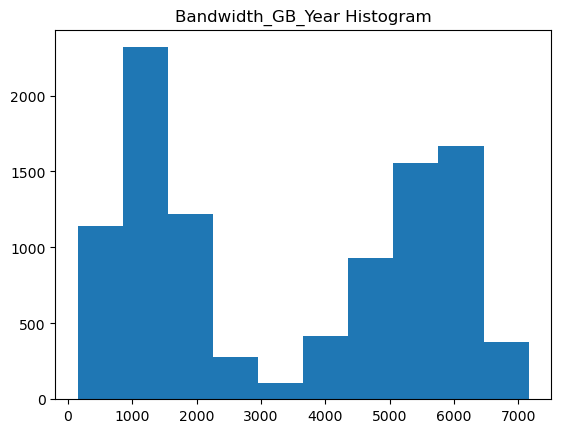

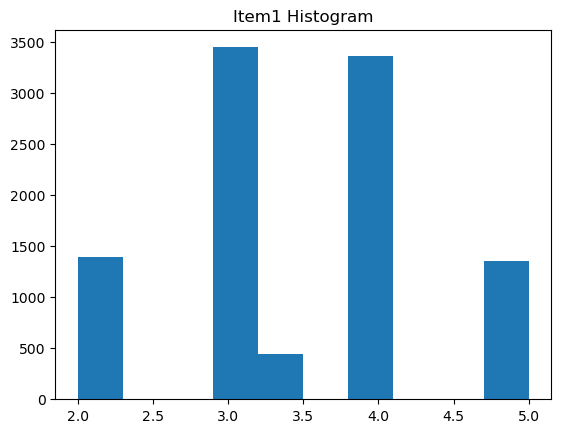

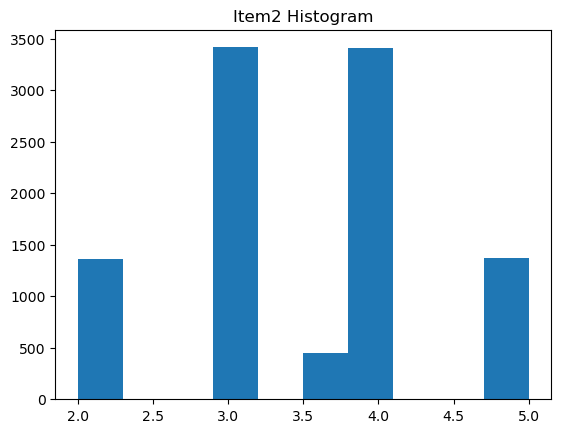

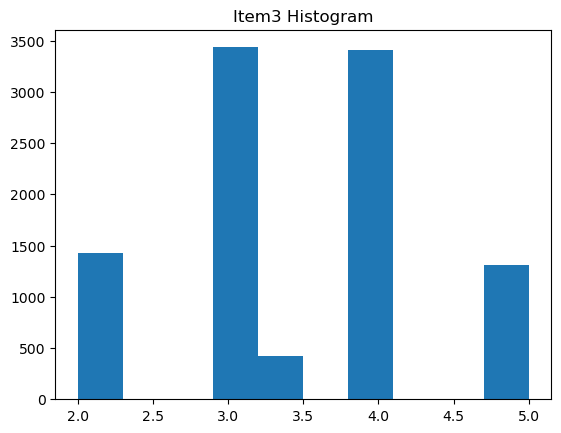

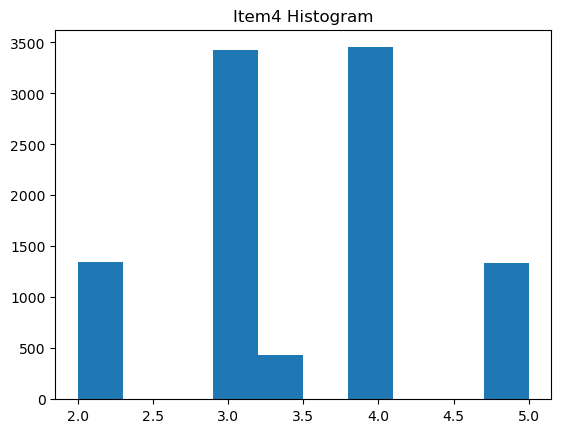

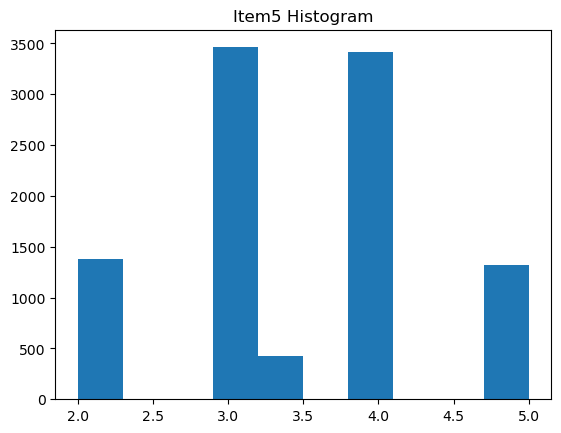

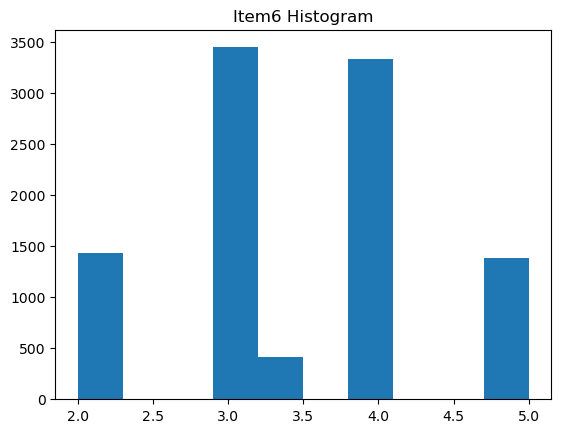

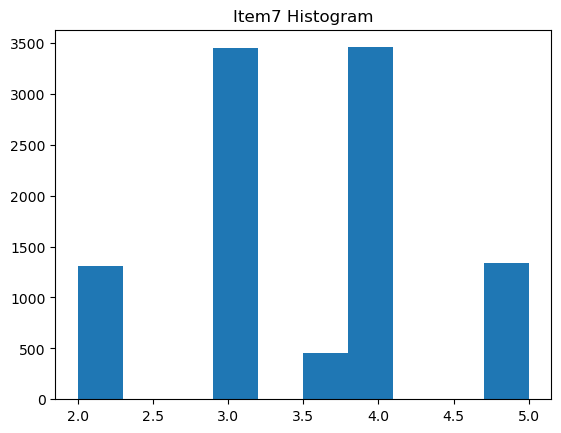

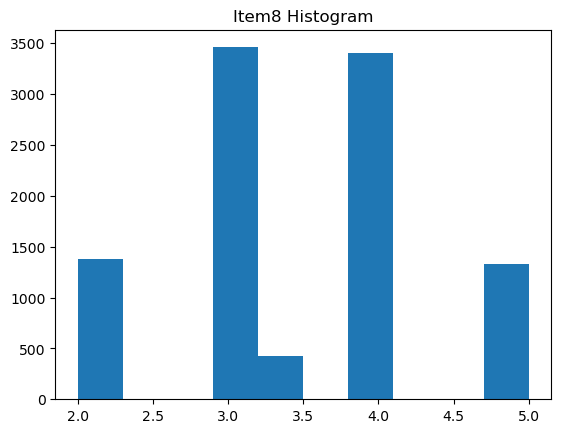

In [18]:
# graph our univariate visualizations
for column in dfq_c:
    plt.hist(dfq[column])
    plt.title(column+' Histogram')
    plt.show()

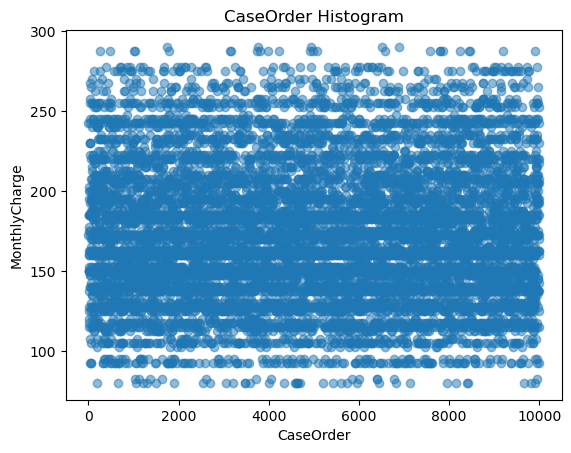

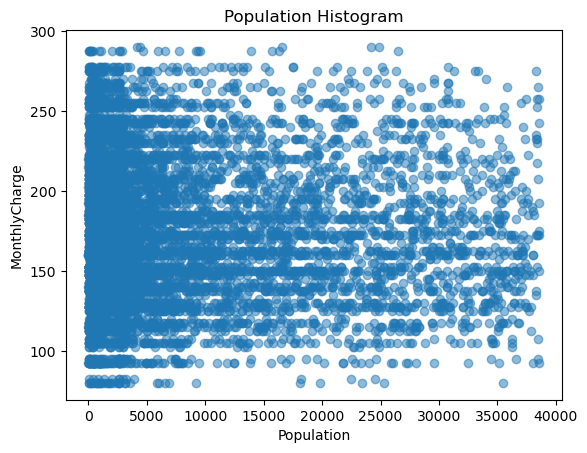

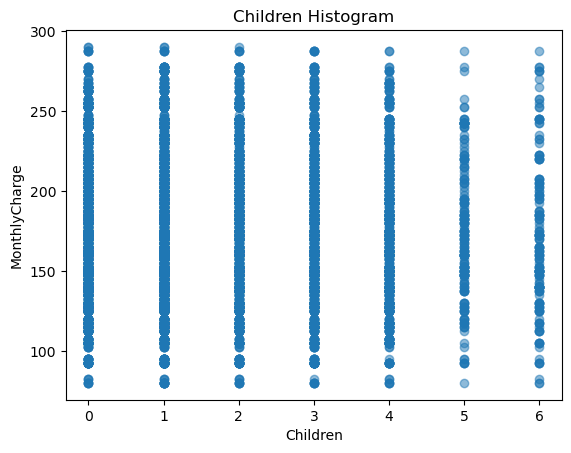

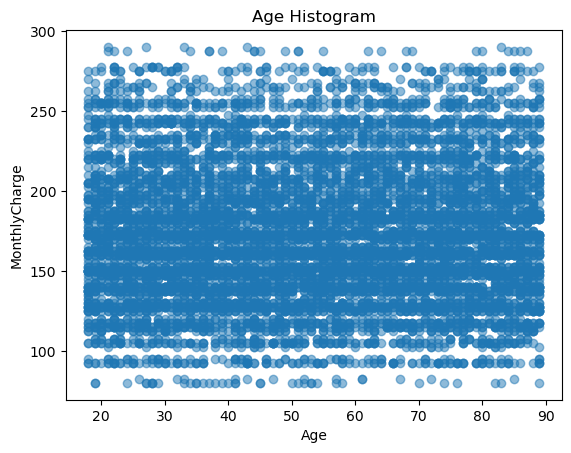

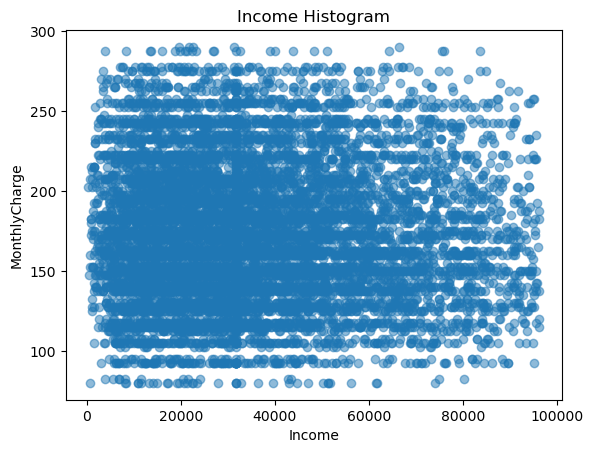

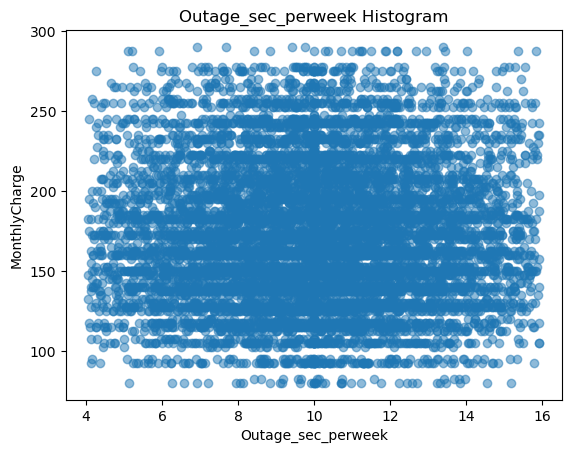

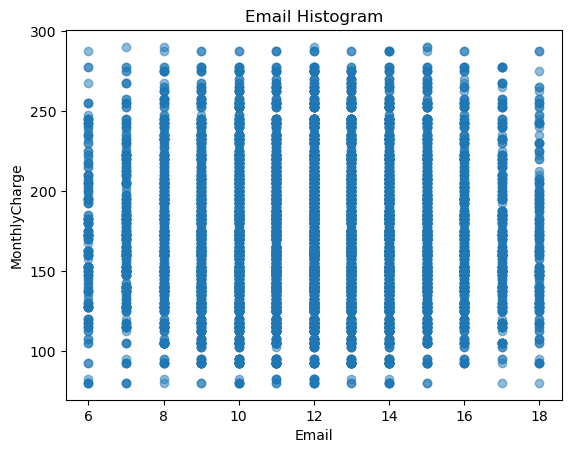

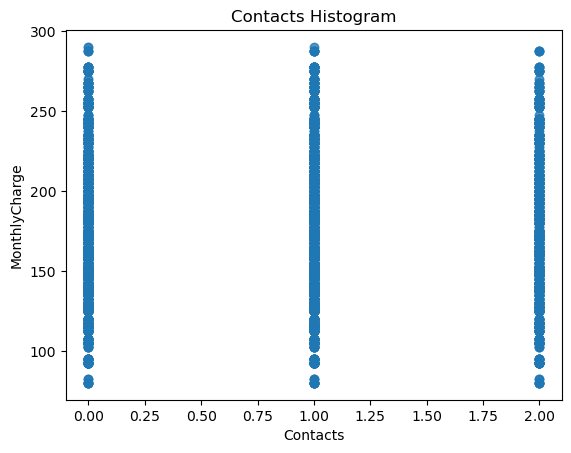

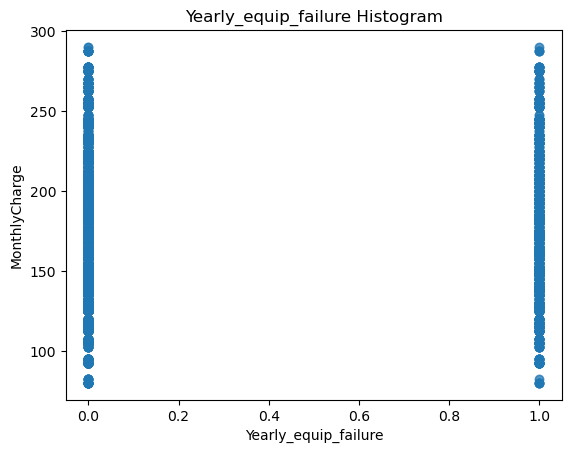

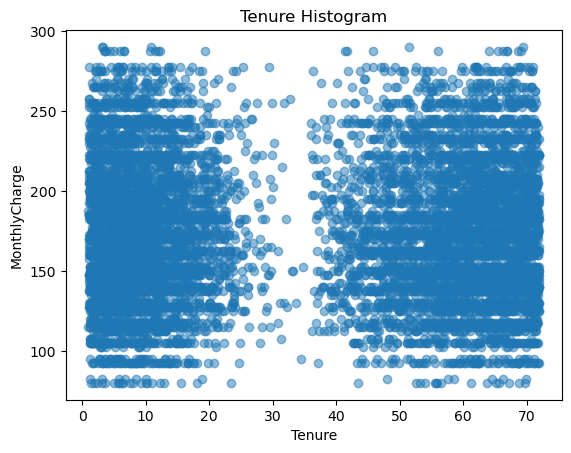

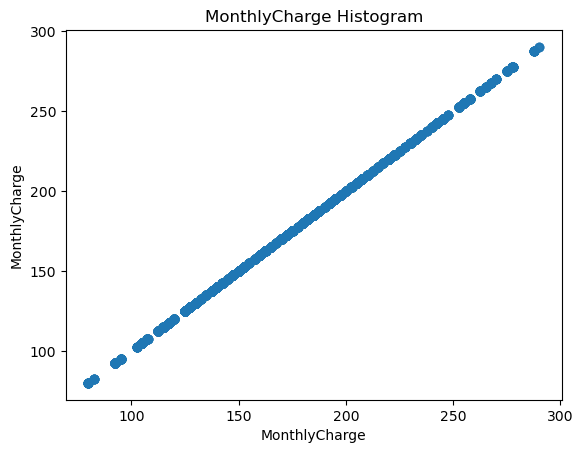

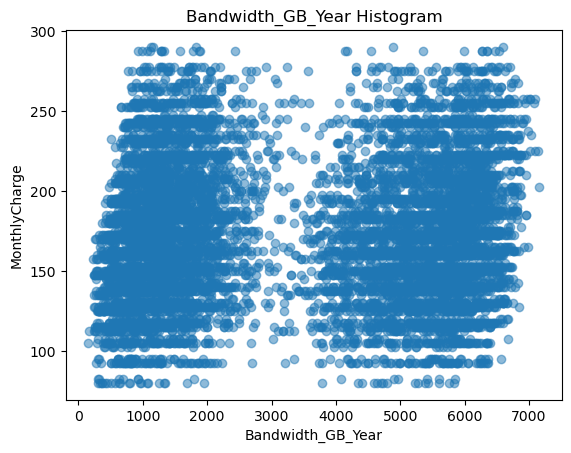

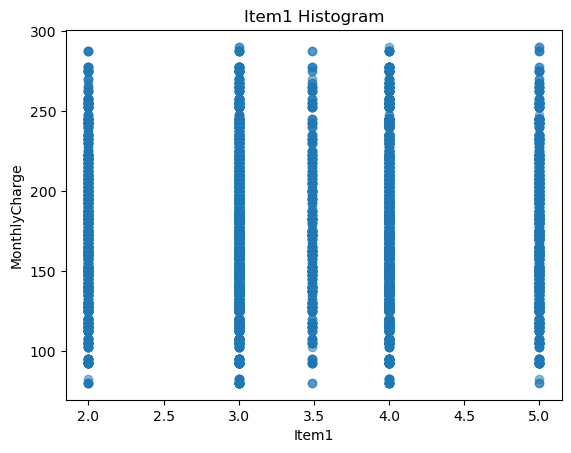

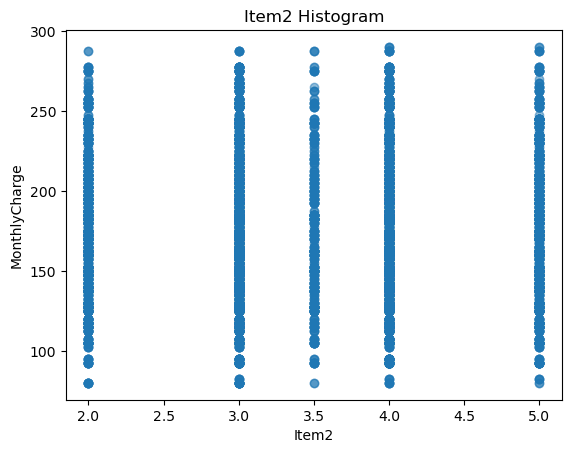

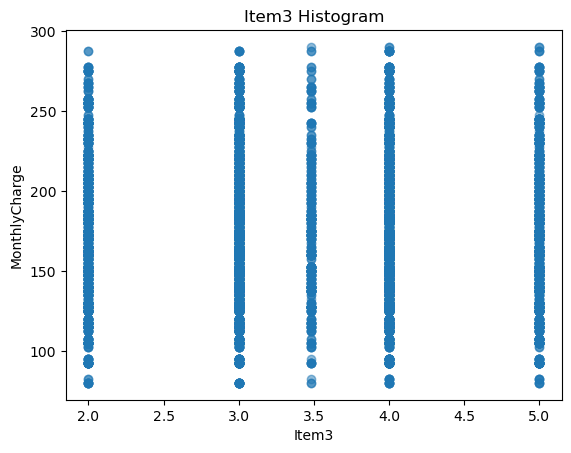

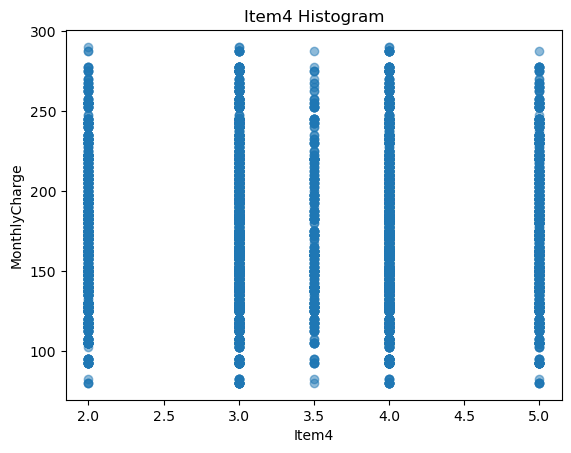

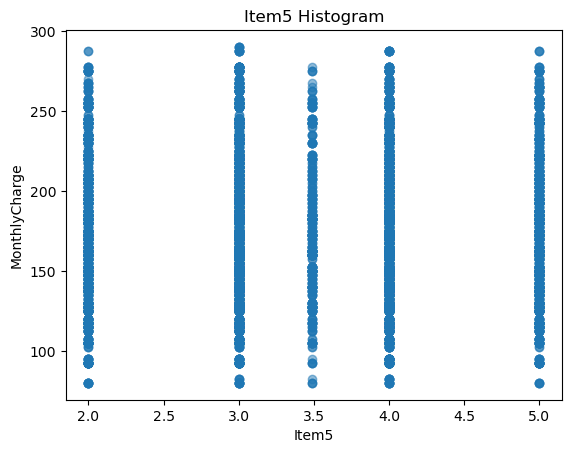

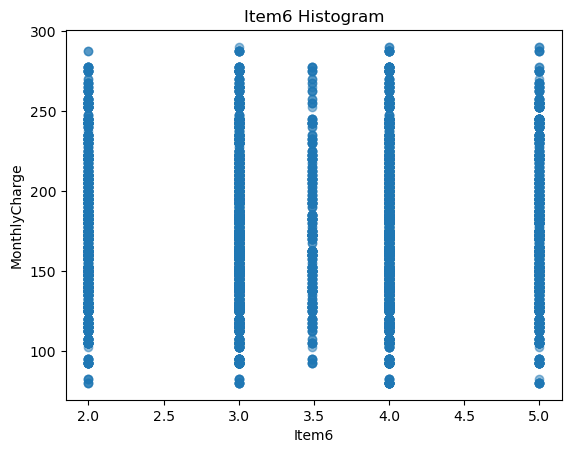

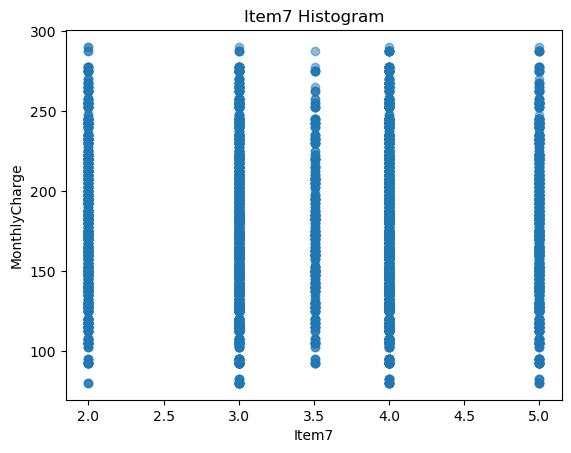

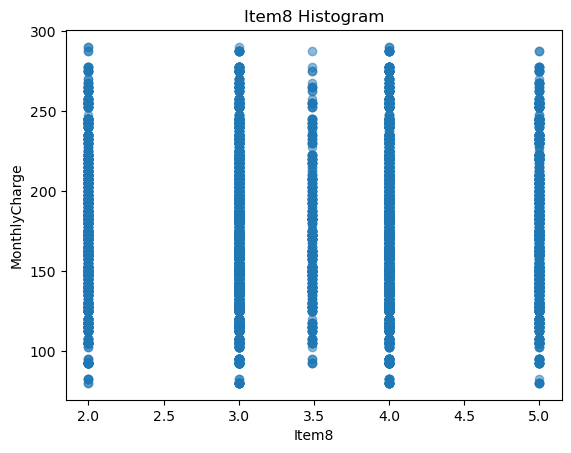

In [19]:
for column in dfq_c:
    x = dfq[column]
    y = dfq['MonthlyCharge']
    plt.scatter(x, y, alpha=0.5)
    plt.title(column + ' Histogram')
    plt.xlabel(column)
    plt.ylabel("MonthlyCharge")
    plt.show()

## C4. Data Transformation (Data Wrangling)

Due to the variables that were selected, no re-expression of categorical variables was necessary. I kep my analysis strictly to the quantitative variables for this test.

For the data transformations, I did data cleaning earlier in the analysis. This included removing nulls from population and removing outliers from all other variables.

## C5. Prepared Dataset

Here, I export the prepared dataset as a .csv file

In [20]:
dfq.to_csv('prepared_data_task1.csv')

## D1. Initial Model

Here I construct an initial multiple linear regression model

In [21]:
# set the dependent variable as monthlycharge and the independent variables as X
y = dfq['MonthlyCharge']
X = dfq[['Population', 'Children', 'Income', 'Contacts', 'Yearly_equip_failure','Outage_sec_perweek', 'Email', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']]

# fit the model to x and Y
model = sm.OLS(y, X)
results = model.fit()

#print the results
print(results.summary())



                                 OLS Regression Results                                
Dep. Variable:          MonthlyCharge   R-squared (uncentered):                   0.935
Model:                            OLS   Adj. R-squared (uncentered):              0.935
Method:                 Least Squares   F-statistic:                              9588.
Date:                Thu, 16 May 2024   Prob (F-statistic):                        0.00
Time:                        19:14:19   Log-Likelihood:                         -52328.
No. Observations:               10000   AIC:                                  1.047e+05
Df Residuals:                    9985   BIC:                                  1.048e+05
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

## D2. & D3. Model Reduction Method and Justification

For this model, none of the p-values are under .05, so backwards stepwise elimination is not going to be used in this case. In order to reduce the model, we can focus on the VIF (Variance Inflation Factor), which allows us to focus on removing variables with multicollinearity. We will use statsmodel to summarize the VIF, and then remove variable above VIF of 10. Then we will repeat the process like you would in backwards stepwise elimination by rerunning the model with the variables removed and removing any more variables with VIF over 10.

The first time we run the VIF functions, we find that Outage_sec_perweek, Email, Item1, Item2, Item3, Item4, Item5, Item6, Item7, and Item8.

After reducing the model for variables that have multicollinearity, we can now run the model again on the reduced variables. There are not variables with p-value greater than .05 so there is no further reduction that is required.

In [22]:
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 

In [23]:
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))]

In [24]:
vif_data

,feature,VIF
0,Population,1.545276
1,Children,2.204783
2,Income,3.731686
3,Contacts,2.271506
4,Yearly_equip_failure,1.361644
5,Outage_sec_perweek,14.575497
6,Email,17.773642
7,Item1,27.319635
8,Item2,25.134908
9,Item3,21.848641


In [25]:
# only keep VIF under 10
X2 = dfq[['Population', 'Children', 'Income', 'Contacts', 'Yearly_equip_failure']]


In [26]:
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X2.columns 


In [27]:
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X2.values, i) 
                          for i in range(len(X2.columns))]

In [28]:
vif_data

,feature,VIF
0,Population,1.428742
1,Children,1.838991
2,Income,2.335074
3,Contacts,1.886724
4,Yearly_equip_failure,1.296982


In [29]:
# fit the model to x and Y
model = sm.OLS(y, X2)
results2 = model.fit()

#print the results
print(results2.summary())



                                 OLS Regression Results                                
Dep. Variable:          MonthlyCharge   R-squared (uncentered):                   0.812
Model:                            OLS   Adj. R-squared (uncentered):              0.812
Method:                 Least Squares   F-statistic:                              8635.
Date:                Thu, 16 May 2024   Prob (F-statistic):                        0.00
Time:                        19:15:00   Log-Likelihood:                         -57644.
No. Observations:               10000   AIC:                                  1.153e+05
Df Residuals:                    9995   BIC:                                  1.153e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

## E1. Model Comparison 

I will be comparing the r-squared. For this, we can see the original model has an adjusted r-squared of .935. The reduced model has an adjusted r-squared of .812. We would prefer to have a higher adjusted r-squared, however the fact that it decreases can tell us a little about what was wrong with the original model. Because the r-squared was so high, we can tell that the multicollinearity that we fixed using the VIF values was skewing the accuracy of the model. Now, even through the r-squared value is lower, the reduced model can be trusted to be more reliable than the initial model.

## E2. & E3. Output and Calculations

We start by plotting a QQ plot of the residuals. Since the residuals follow a straight line, we can assume that the distribution of the data is normal.

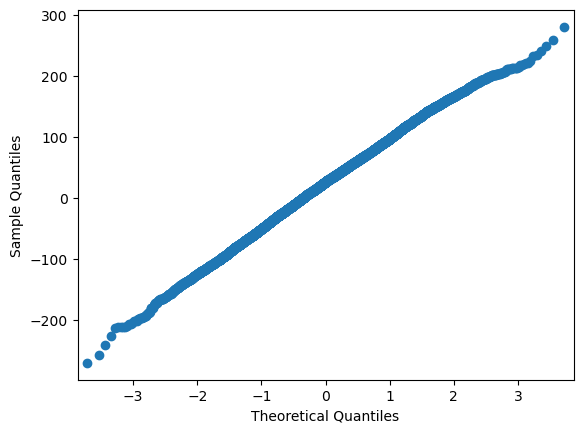

In [30]:
res = results2.resid # residuals
fig = sm.qqplot(res)
plt.show()

For the regression plots, I also create them for each of the independent variables used in the model. This is done using a for loop running it across all of the variables in the model.

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


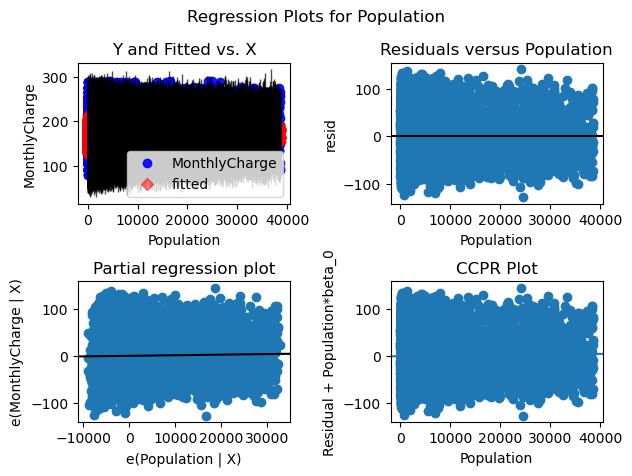

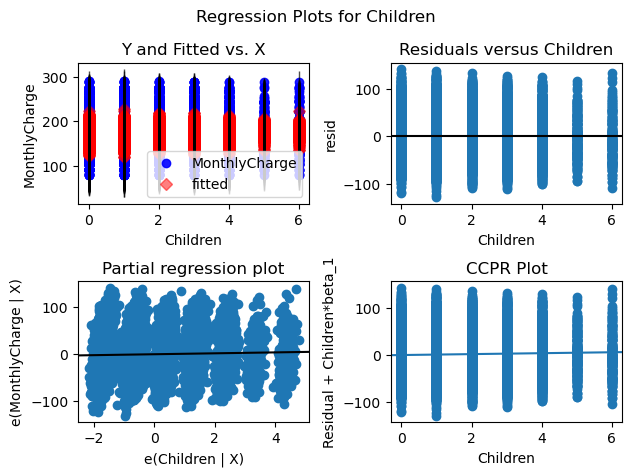

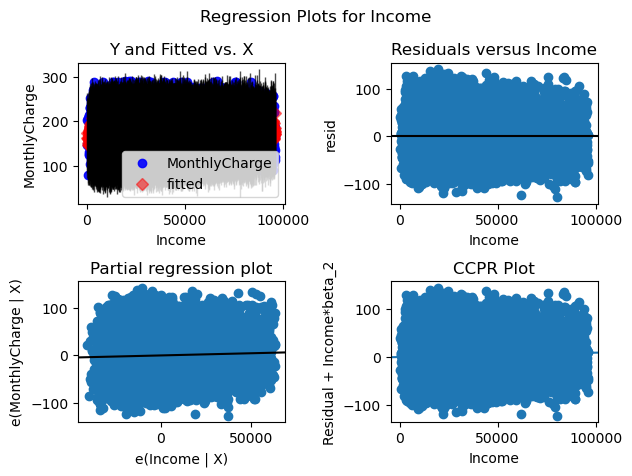

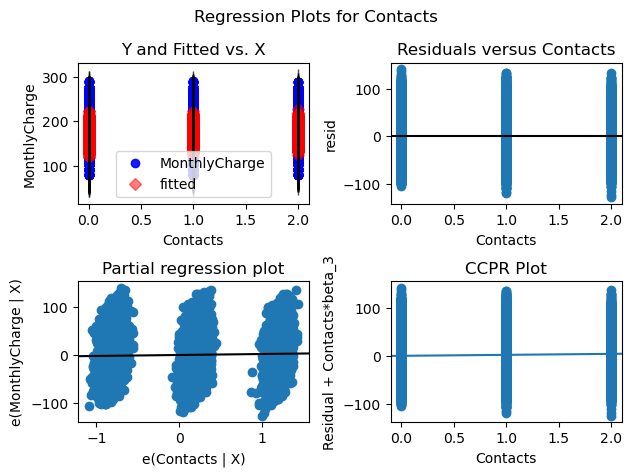

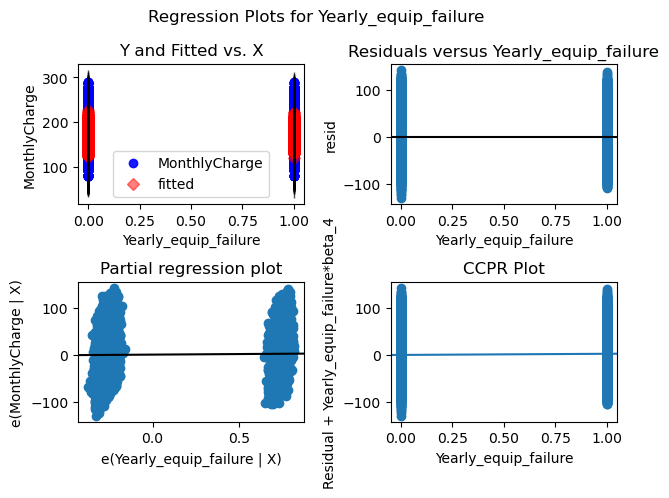

In [31]:
for column in X2:
    fig = sm.graphics.plot_regress_exog(results, column)
    fig.tight_layout(pad=1.0)

To find the residual standard error, we can use the following function:
results.bse.

This is useful as the smaller the residual standard error, the better the regression model fits the dataset. We can see that income is the smallest and the best fit in terms of fitting for the dataset.

In [ ]:
print(results.bse)

## F1. Regression Equation, Coefficients, etc.

#### Regression Equation

We can make a regression equation from the summary of the reduced model. This is the dependent variable (y) is equal to (x_n) times the coefficients added together. This means our regression equation is:

$$
{y_{MonthlyCharge}} = {x_{Population}}*0.0020 + {x_{Children}}*17.7578 + {x_{Income}}*0.0019 + {x_{Contacts}}*37.3696 + {x_{Yearly Equip Failure}*32.8553
$$

#### Coefficients 

- The coefficient for "Population" (0.002) indicates that, holding all other variables constant, for every one unit increase in the population, the cost increases by an average of .002 dollars. 
- The coefficient for "Children" (17.7578) indicates that, holding all other variables constant, for every one unit increase in the Children, the cost increases by an average of 17.7578 dollars. 
- The coefficient for "Income" (0.0019) indicates that, holding all other variables constant, for every one unit increase in the Income, the cost increases by an average of 0.0019 dollars. 
- The coefficient for "Contacts" (37.3696) indicates that, holding all other variables constant, for every one unit increase in the Contacts, the cost increases by an average of 37.3696 dollars. 
- The coefficient for "Yearly_equip_failure" (32.8553) indicates that, holding all other variables constant, for every one unit increase in the Yearly_equip_failure, the cost increases by an average of 32.8553 dollars. 

#### Statistical Significance & Practical Signficance of Reduced Model

The model is statistically significant because the adjusted r-squared tells us that it is good at predicting MonthlyChurn because it is close to 1, which is the maximum it can be. The number of variables has also been considered since the adjusted r-squared adjusts the score to take into consideration the number of independent variables. 

In terms of being practically significant, it can help us identify what are the important items that affect MonthlyCharge. For instance, we know that units of contacts and yearly_equip_failure increase the MonthlyCharge value per unit at a much larger rate than population or income. 

#### Disadvantages

One problem is that the basis of a linear regression model assumes that these relationships are linear. However, many of these relationship may not be, and we would not be accurately able to represent the nuances of their relationships with one another using only a straight line on a graph like linear regression attempts to use. Another is that we did not check for homoscedasticity among the variables in this model.

## F2. Recommendations

The recommendations based off of the model that was created are to focus on understanding why the highest coefficient items play such a significant affect on MonthlyCharge. This can help us understand why some customers may be paying more than others, and perhaps allow us to target those high value customers. For instance, questions like "Why would the yearly_equip_failures be positively correlated?" Is it because the customer pays for more equipment, so as a result there are more likely to be things broken in the system? Exploring questions like these allows us to understand the data further, and understand how we can optimize business decisions for higher paying customers.

## H. Third Party Sources of Code

https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/# was used to find the VIF using statsmodel

## I. Sources

Adjusted R-squared. Corporate Finance Institute. (2023, November 21). https://corporatefinanceinstitute.com/resources/data-science/adjusted-r-squared/ 

Grover, J. (2021, March 28). Short python code for Backward Elimination with detailed explanation. Medium. https://groverjatin.medium.com/short-python-code-for-backward-elimination-with-detailed-explanation-52894a9a7880 

Regression plots¶. Regression Plots - statsmodels 0.15.0 (+272). (n.d.). https://www.statsmodels.org/devel/examples/notebooks/generated/regression_plots.html

D208 - Interpretation of coefficients. (n.d.). 